In [2]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
%matplotlib inline
sns.set(style="whitegrid")


In [3]:
# Define file paths
normal_csv_path = './results_ground_post_normal.csv'
post_csv_path = './results_ground_post.csv'

# Load CSV files into pandas DataFrames
df_normal = pd.read_csv(normal_csv_path)
df_post = pd.read_csv(post_csv_path)

# Display the first few rows of each DataFrame
print("Normal Corpus Results:")
display(df_normal.head())

print("\nPOS-Tagged Corpus Results:")
display(df_post.head())


Normal Corpus Results:


,training iterations,perplexity,perplexity POS
0,500,501.971710,inf
1,1000,4001.313477,inf
2,1500,11923.074219,inf
3,2000,31113.558594,inf
4,2500,78268.773438,inf



POS-Tagged Corpus Results:


,training iterations,perplexity,perplexity POS
0,500,386.714050,1.328420
1,1000,2602.852051,1.438564
2,1500,7002.807617,1.481481
3,2000,14729.181641,1.518822
4,2500,25789.056641,1.627241


In [4]:
# Check for missing values
print("Missing values in Normal Corpus:")
print(df_normal.isnull().sum())

print("\nMissing values in POS-Tagged Corpus:")
print(df_post.isnull().sum())

# Ensure that training iterations match between both datasets
iterations_normal = set(df_normal['training iterations'])
iterations_post = set(df_post['training iterations'])

common_iterations = iterations_normal.intersection(iterations_post)
print(f"\nNumber of common training iterations: {len(common_iterations)}")

if len(common_iterations) == len(df_normal) and len(common_iterations) == len(df_post):
    print("All training iterations match between datasets.")
else:
    print("Mismatch in training iterations between datasets.")


Missing values in Normal Corpus:
training iterations    0
perplexity             0
perplexity POS         0
dtype: int64

Missing values in POS-Tagged Corpus:
training iterations    0
perplexity             0
perplexity POS         0
dtype: int64

Number of common training iterations: 10
All training iterations match between datasets.


In [5]:
# Summary statistics for Normal Corpus
print("Summary Statistics - Normal Corpus:")
display(df_normal.describe())

# Summary statistics for POS-Tagged Corpus
print("\nSummary Statistics - POS-Tagged Corpus:")
display(df_post.describe())


Summary Statistics - Normal Corpus:


/pio/scratch/1/i317214/miniconda/envs/hallucination_detection/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/pio/scratch/1/i317214/miniconda/envs/hallucination_detection/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4720: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,training iterations,perplexity,perplexity POS
count,10.000000,10.000000,10.0
mean,2750.000000,144427.248831,inf
std,1513.825177,142416.943076,NaN
min,500.000000,501.971710,inf
25%,1625.000000,16720.695312,NaN
50%,2750.000000,116062.238281,NaN
75%,3875.000000,246163.632812,NaN
max,5000.000000,358741.031250,inf



Summary Statistics - POS-Tagged Corpus:


,training iterations,perplexity,perplexity POS
count,10.000000,10.000000,10.000000
mean,2750.000000,43511.715887,1.617363
std,1513.825177,40906.234291,0.169160
min,500.000000,386.714050,1.328420
25%,1625.000000,8934.401123,1.490817
50%,2750.000000,32487.764648,1.640822
75%,3875.000000,77603.840820,1.759413
max,5000.000000,117524.171875,1.842964


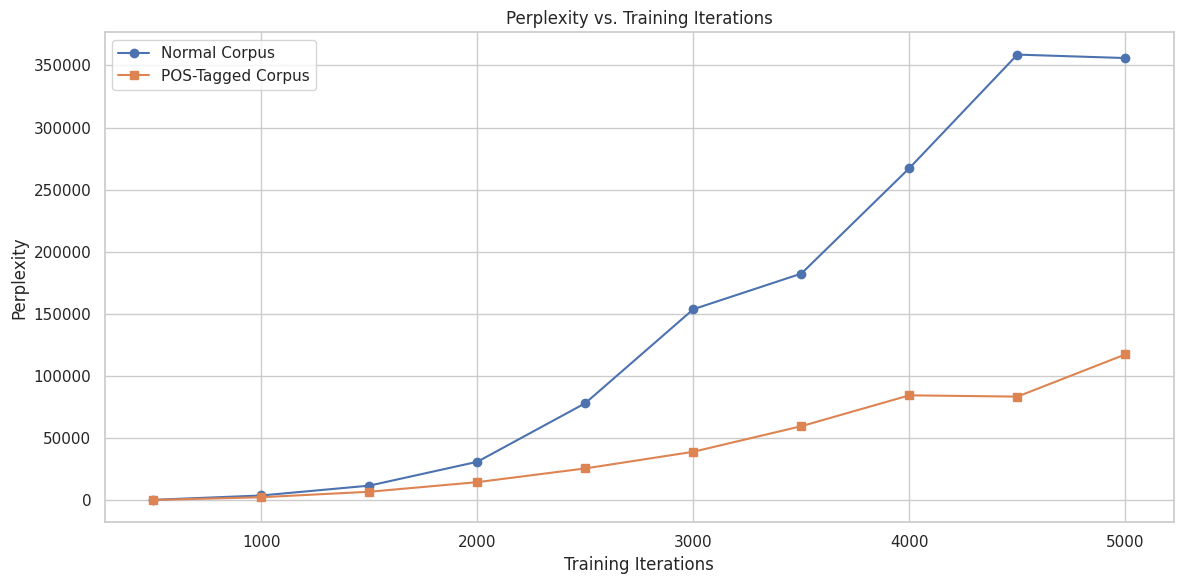

In [15]:
# Merge the two DataFrames on 'training iterations' for comparison
df_merged = pd.merge(df_normal, df_post, on='training iterations', suffixes=('_normal', '_POS'))

# Plot perplexity for both corpora
plt.figure(figsize=(12, 6))
plt.plot(df_merged['training iterations'], df_merged['perplexity_normal'], label='Normal Corpus', marker='o')
plt.plot(df_merged['training iterations'], df_merged['perplexity_POS'], label='POS-Tagged Corpus', marker='s')
plt.xlabel('Training Iterations')
plt.ylabel('Perplexity')
plt.title('Perplexity vs. Training Iterations')
plt.legend()
plt.tight_layout()
plt.savefig('perplexity_vs_training_iterations.png')
plt.show()

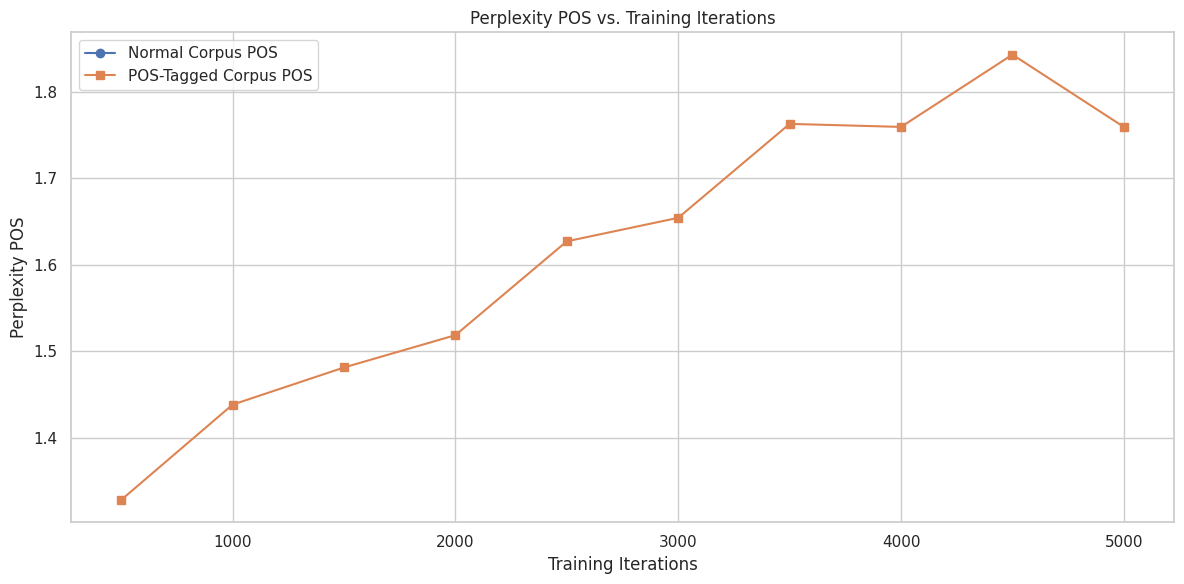

In [7]:
# Plot perplexity POS for both corpora
plt.figure(figsize=(12, 6))
plt.plot(df_merged['training iterations'], df_merged['perplexity POS_normal'], label='Normal Corpus POS', marker='o')
plt.plot(df_merged['training iterations'], df_merged['perplexity POS_POS'], label='POS-Tagged Corpus POS', marker='s')
plt.xlabel('Training Iterations')
plt.ylabel('Perplexity POS')
plt.title('Perplexity POS vs. Training Iterations')
plt.legend()
plt.tight_layout()
plt.show()


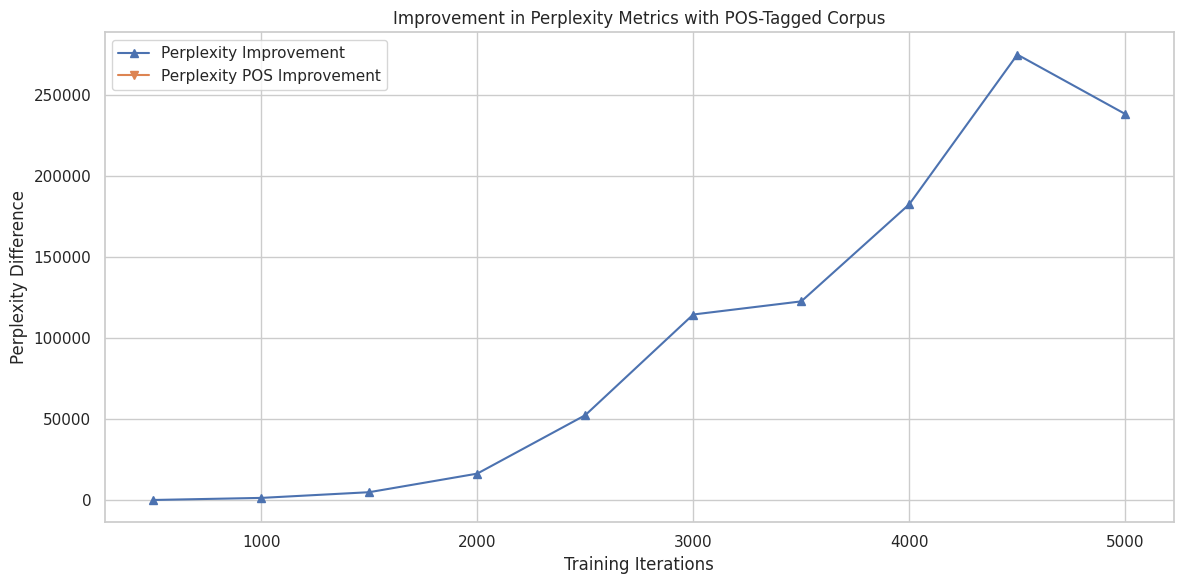

In [8]:
# Calculate the difference in perplexity between normal and POS-tagged corpora
df_merged['perplexity_diff'] = df_merged['perplexity_normal'] - df_merged['perplexity_POS']
df_merged['perplexity_POS_diff'] = df_merged['perplexity POS_normal'] - df_merged['perplexity POS_POS']

# Plot the differences
plt.figure(figsize=(12, 6))
plt.plot(df_merged['training iterations'], df_merged['perplexity_diff'], label='Perplexity Improvement', marker='^')
plt.plot(df_merged['training iterations'], df_merged['perplexity_POS_diff'], label='Perplexity POS Improvement', marker='v')
plt.xlabel('Training Iterations')
plt.ylabel('Perplexity Difference')
plt.title('Improvement in Perplexity Metrics with POS-Tagged Corpus')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
from scipy import stats

# Perform statistical tests to determine if differences are significant
# Example: Paired t-test for perplexity
t_stat, p_val = stats.ttest_rel(df_merged['perplexity_normal'], df_merged['perplexity_POS'])
print(f"Paired t-test for Perplexity:\nT-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# Example: Paired t-test for perplexity POS
t_stat_pos, p_val_pos = stats.ttest_rel(df_merged['perplexity POS_normal'], df_merged['perplexity POS_POS'])
print(f"\nPaired t-test for Perplexity POS:\nT-statistic: {t_stat_pos:.4f}, P-value: {p_val_pos:.4f}")


Paired t-test for Perplexity:
T-statistic: 3.0992, P-value: 0.0127

Paired t-test for Perplexity POS:
T-statistic: nan, P-value: nan


/pio/scratch/1/i317214/miniconda/envs/hallucination_detection/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1054: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [10]:
# Compute correlation between training iterations and perplexity metrics
corr_normal = df_normal['training iterations'].corr(df_normal['perplexity'])
corr_pos = df_post['training iterations'].corr(df_post['perplexity POS'])

print(f"Correlation between Training Iterations and Perplexity (Normal): {corr_normal:.4f}")
print(f"Correlation between Training Iterations and Perplexity POS (POS-Tagged): {corr_pos:.4f}")


Correlation between Training Iterations and Perplexity (Normal): 0.9650
Correlation between Training Iterations and Perplexity POS (POS-Tagged): 0.9609


In [11]:
# Save the merged DataFrame with differences to a new CSV
merged_csv_path = './merged_results_analysis.csv'
df_merged.to_csv(merged_csv_path, index=False)
print(f"Merged analysis results saved to {merged_csv_path}")


Merged analysis results saved to ./merged_results_analysis.csv


In [12]:
# Summary of findings
print("### Summary of Analysis ###\n")

# Average perplexity
avg_perplexity_normal = df_normal['perplexity'].mean()
avg_perplexity_POS = df_post['perplexity POS'].mean()
print(f"Average Perplexity - Normal Corpus: {avg_perplexity_normal:.2f}")
print(f"Average Perplexity POS - POS-Tagged Corpus: {avg_perplexity_POS:.2f}\n")

# Average perplexity differences
avg_diff = df_merged['perplexity_diff'].mean()
avg_diff_pos = df_merged['perplexity_POS_diff'].mean()
print(f"Average Perplexity Improvement: {avg_diff:.2f}")
print(f"Average Perplexity POS Improvement: {avg_diff_pos:.2f}\n")

# Statistical significance
print("### Statistical Significance ###")
if p_val < 0.05:
    print(f"Perplexity improvement is statistically significant (p = {p_val:.4f}).")
else:
    print(f"Perplexity improvement is not statistically significant (p = {p_val:.4f}).")

if p_val_pos < 0.05:
    print(f"Perplexity POS improvement is statistically significant (p = {p_val_pos:.4f}).")
else:
    print(f"Perplexity POS improvement is not statistically significant (p = {p_val_pos:.4f}).")


### Summary of Analysis ###

Average Perplexity - Normal Corpus: 144427.25
Average Perplexity POS - POS-Tagged Corpus: 1.62

Average Perplexity Improvement: 100915.53
Average Perplexity POS Improvement: inf

### Statistical Significance ###
Perplexity improvement is statistically significant (p = 0.0127).
Perplexity POS improvement is not statistically significant (p = nan).


In [13]:
# Recommendations based on analysis
print("### Recommendations ###\n")

if avg_diff > 0 and p_val < 0.05:
    print("- The POS-tagged corpus shows a significant improvement in perplexity.")
else:
    print("- The POS-tagged corpus does not show a significant improvement in perplexity.")

if avg_diff_pos > 0 and p_val_pos < 0.05:
    print("- The POS-tagged corpus shows a significant improvement in Perplexity POS.")
else:
    print("- The POS-tagged corpus does not show a significant improvement in Perplexity POS.")

print("\n### Next Steps ###")
print("- Investigate why the POS-tagged corpus may not be improving perplexity as expected.")
print("- Experiment with different POS-tagging strategies or rare character mappings.")
print("- Increase the evaluation steps for a more comprehensive analysis.")
print("- Explore other metrics beyond perplexity for model evaluation.")


### Recommendations ###

- The POS-tagged corpus shows a significant improvement in perplexity.
- The POS-tagged corpus does not show a significant improvement in Perplexity POS.

### Next Steps ###
- Investigate why the POS-tagged corpus may not be improving perplexity as expected.
- Experiment with different POS-tagging strategies or rare character mappings.
- Increase the evaluation steps for a more comprehensive analysis.
- Explore other metrics beyond perplexity for model evaluation.
